Hipótesis general:
Se espera que la duración del ejercicio y la frecuencia cardíaca máxima influyan en la cantidad de calorías quemadas.

Hipótesis nula (H₀):
La duración del ejercicio y la frecuencia cardíaca máxima no tienen un efecto significativo en la cantidad de calorías quemadas.

Matemáticamente:

𝐻0: 𝛽1 = 0 y 𝛽2 =0

Hipótesis alternativa (H₁):
Al menos una de las variables (Duración o MaxPulse) tiene un efecto significativo en la cantidad de calorías quemadas.


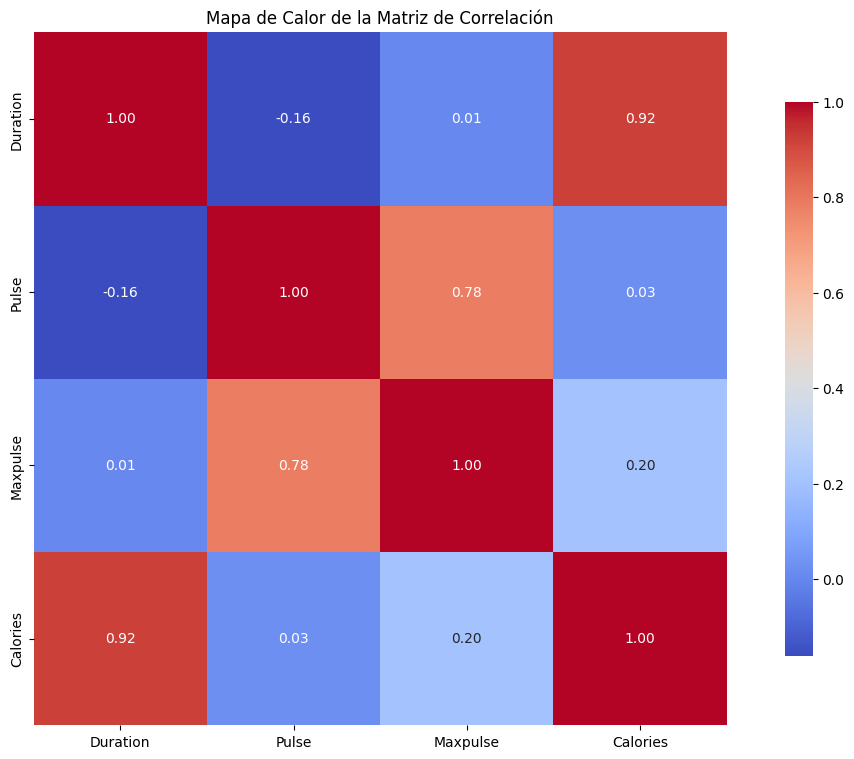

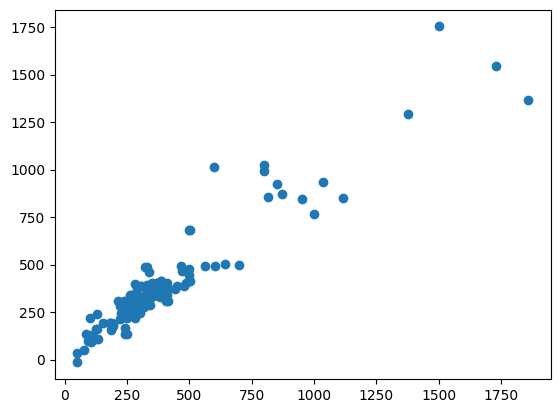

Coeficiente de determinación:  0.8908

valor-p de Shapiro:  0.00000000004660

valor_p de Breusch-Pagan:  0.00000000000008



In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/Aleman2202/Estadistica-Inferenical-II/refs/heads/main/data%20(2).csv")
df.dropna(inplace = True) 
df

correlation_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')

X = df[["Duration", "Maxpulse"]]
Y = df["Calories"]

import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

Yc = modelo.predict(x_constante)

plt.figure()
plt.scatter(Y, Yc)
plt.show()

from sklearn.metrics import r2_score  
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.14f}\n')


residuales = modelo.resid

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.14f}\n')










Coeficiente de correlación (r = 0.9448)

Esto indica una correlación muy fuerte y positiva entre las variables independientes y las calorías quemadas.
Un valor cercano a 1 sugiere que a medida que aumentan la duración del ejercicio y la frecuencia cardíaca máxima, también lo hace el número de calorías quemadas.

Coeficiente de determinación (R² = 0.8908)

Indica que el modelo explica aproximadamente el 89.08% de la variabilidad de las calorías quemadas.
Es un valor alto, lo que sugiere un buen ajuste del modelo.

Valor-p de Shapiro-Wilk ( 0.00000000004660)

Se rechaza la hipótesis nula de normalidad.
Los residuos no siguen una distribución normal.

Valor-p de Breusch-Pagan (p = 0.00000000000008)

Se rechaza la hipótesis nula de homocedasticidad.
Hay heterocedasticidad, lo que implica que los errores del modelo no tienen varianza constante. Esto puede sesgar los errores estándar y afectar la confiabilidad de las inferencias.

Conclusión General

Hay una relación fuerte y positiva entre la duración del ejercicio, la frecuencia cardíaca máxima y la cantidad de calorías quemadas.
El modelo tiene un buen ajuste (𝑅2 = 0.89), pero hay problemas con normalidad y homocedasticidad, lo que puede afectar su validez.
Sería recomendable considerar transformaciones de datos, correcciones para heterocedasticidad o métodos robustos para mejorar la confiabilidad del análisis.